tag      :b'BM'
fileSize :66614
rgbOffset:1078
infoSize :40
width    :256
height   :256
pane     :1
color    :8
compress :0
rgbSize  :0


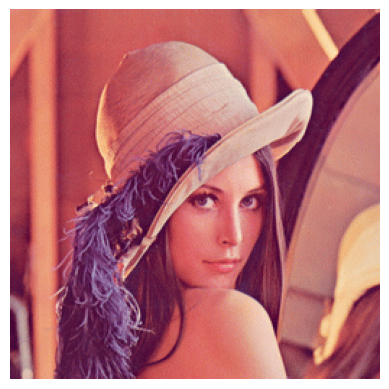

In [1]:
import struct  # 用于读取字节。
import matplotlib.image as mpimg  # mpimg 用于读取图片
import matplotlib.pyplot as plt  # plt 用于显示图片
import numpy as np # numpy


class bmp:
    def __init__(self, tp):
        self.tag = tp[0]  # 标签
        self.fileSize = tp[1]  # 文件大小
        self.rgbOffset = tp[4]  # rgb偏移量
        self.infoSize = tp[5]  # 头部所需字节
        self.width = tp[6]  # 宽度
        self.height = tp[7]  # 高度
        self.pane = tp[8]  # 颜色板
        self.color = tp[9]  # 颜色种类
        self.compress = tp[10]  # 压缩
        self.rgbSize = tp[11]  # rgb大小

    def print_bmp_header(self):
        print("tag      :{}".format(self.tag))
        print("fileSize :{}".format(self.fileSize))
        print("rgbOffset:{}".format(self.rgbOffset))
        print("infoSize :{}".format(self.infoSize))
        print("width    :{}".format(self.width))
        print("height   :{}".format(self.height))
        print("pane     :{}".format(self.pane))
        print("color    :{}".format(self.color))
        print("compress :{}".format(self.compress))
        print("rgbSize  :{}".format(self.rgbSize))


f = open('Lena.bmp', 'rb')
bmp_header_b = f.read(0x36)
bmp_header_s = struct.unpack('<2sI2H4I2H6I', bmp_header_b)  # 按bmp的数据形式解包
image = bmp(bmp_header_s)
image.print_bmp_header()

# pixels = np.array(image
for i in range(image.width):
    for j in range(image.height):
        pass


car = mpimg.imread('Lena.bmp')

car.shape  # (512, 512, 3)

plt.imshow(car)  # 显示图片
plt.axis('off')  # 不显示坐标轴
plt.show()


类型: b'BM' 
大小: 66614 
位图数据偏移量: 1078 
宽度: 256 
高度: 256 
位图: 8


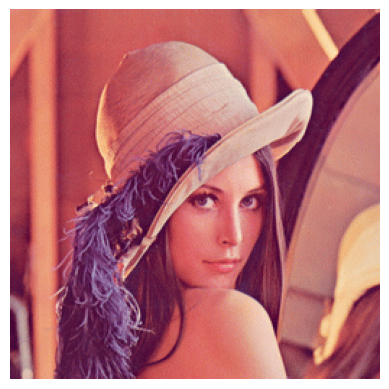

error: unpack requires a buffer of 4 bytes

In [8]:
import  numpy as np
import struct
import matplotlib.pyplot as plt

class bmp_header:

    def __init__(self, f_type, f_sizeByte, f_reserved,
                f_offsetByte, f_bih_size, f_width, 
                f_height, f_planes, f_bitcount):
        self.type = f_type
        self.sizeByte = f_sizeByte
        self.reserved = f_reserved
        self.offsetByte = f_offsetByte
        self.bihSize = f_bih_size
        self.width = f_width
        self.height = f_height
        self.planes = f_planes
        self.bitcount = f_bitcount

    def printBitMapHeaderInfo(self):
            print("类型:", self.type, 
                "\n大小:", self.sizeByte,
                "\n保留大小:", self.reserved,
                "\n位图数据偏移量:", self.offsetByte,
                "\n位图信息头大小:", self.bihSize,
                "\n宽度:", self.width,
                "\n高度:", self.height,
                "\n位图位面数:", self.planes,
                "\n位图像素位数:", self.bitcount)

class bmp:

    def __init__(self, filename):
        self.fileName = filename


    def loadBmp(self):
        '先将位图打开'
        f = open('Lena.bmp','rb')         #打开对应的文件

        self.__loadBmpFileHeader(f)
        self.__loadBmpColorsTable(f)
        self.__loadBmpBits(f)

        f.close()


    def __loadBmpFileHeader(self, fileReader):
        '下面部分用来读取BMP位图的基础信息'
        f_type = str(f.read(2))                     # 文件类型 需要读取2个字节
        file_size_byte = f.read(4)                  # 读取文件的大小 需要读取4个字节
        file_reserved = f.read(4)                   # 保留字段
        file_ofset_byte = f.read(4)                 # 读取位图数据的偏移量
        file_bmpInfoHeader_size = f.read(4)         # 读取位图信息头长度
        file_wide_byte = f.read(4)                  # 读取宽度字节
        file_height_byte = f.read(4)                # 读取高度字节
        file_planes = f.read(2)                     # 读取位图位面数
        file_bitcount_byte = f.read(4)              # 得到每个像素占位大小

        # 下面就是将读取的字节转换成指定的类型
        f_size, = struct.unpack('l',file_size_byte)
        f_reserved, = struct.unpack('i', file_reserved)
        f_offset, = struct.unpack('l',file_ofset_byte)
        f_bih_size, = struct.unpack('i', file_bmpInfoHeader_size)
        f_wide, = struct.unpack('l',file_wide_byte)
        f_height, = struct.unpack('l',file_height_byte)
        f_planes = file_planes
        f_bitcount, = struct.unpack('i',file_bitcount_byte)

        self.bmpHeader = bmp_header(f_type, f_size, f_reserved, f_offset, 
                                    f_bih_size, f_wide, f_height, f_planes, f_bitcount)

    def __loadBmpColorsTable(self, fileReader):
        # 读取颜色表
        self.color_table = np.empty(shape=[256,4],dtype=int)
        f.seek(54) # 跳过文件信息头和位图信息头
        for i in range(0,256):
            b = struct.unpack('B',f.read(1))[0];
            g = struct.unpack('B', f.read(1))[0];
            r = struct.unpack('B', f.read(1))[0];
            alpha = struct.unpack('B', f.read(1))[0];
            self.color_table[i][0] = r
            self.color_table[i][1] = g
            self.color_table[i][2] = b
            self.color_table[i][3] = 255

    def __loadBmpBits(self, fileReader):
        # 读取BMP位图数据区域,将数据存入numpy数组
        # 首先对文件指针进行偏移
        f.seek(self.bmpHeader.offsetByte)
        # 因为图像是8位伪彩色图像，所以一个像素点占一个字节，即8位
        self.bmpHeader.printBitMapHeaderInfo()
        self.img = np.empty(shape=[self.bmpHeader.height, self.bmpHeader.width, 4], dtype=int)
        cout = 0
        for y in range(0, self.bmpHeader.height):
            for x in range(0, self.bmpHeader.width):
                cout = cout + 1
                index=struct.unpack('B',f.read(1))[0]
                self.img[self.bmpHeader.height-y-1, x] = self.color_table[index]
            while (cout % 4) != 0:
                f.read(1)
                cout = cout + 1

    def drawBmp(self):
        plt.imshow(self.img)
        plt.axis('off')  # 不显示坐标轴
        plt.show()
    

def main():

    '先将位图打开'
    f = open('Lena.bmp','rb')         #打开对应的文件

    '下面部分用来读取BMP位图的基础信息'
    f_type = str(f.read(2))                     # 文件类型 需要读取2个字节
    file_size_byte = f.read(4)                  # 读取文件的大小 需要读取4个字节
    file_reserved = f.read(4)                   # 保留字段
    file_ofset_byte = f.read(4)                 # 读取位图数据的偏移量
    file_bmInfoHeader_size = f.read(4)          # 读取位图信息头长度
    file_wide_byte = f.read(4)                  # 读取宽度字节
    file_height_byte = f.read(4)                # 读取高度字节
    file_planes = f.read(2)                     # 读取位图位面数
    file_bitcount_byte = f.read(4)              # 得到每个像素占位大小


    # 下面就是将读取的字节转换成指定的类型
    f_size, = struct.unpack('l',file_size_byte)
    f_ofset, = struct.unpack('l',file_ofset_byte)
    f_wide, = struct.unpack('l',file_wide_byte)
    f_height, = struct.unpack('l',file_height_byte)
    f_bitcount, = struct.unpack('i',file_bitcount_byte)
    print("类型:", f_type, 
        "\n大小:", f_size, 
        "\n位图数据偏移量:", f_ofset,
        "\n宽度:",f_wide,
        "\n高度:",f_height,
        "\n位图:",f_bitcount)


    # 读取颜色表
    color_table = np.empty(shape=[256,4],dtype=int)
    f.seek(54) # 跳过文件信息头和位图信息头
    for i in range(0,256):
        b = struct.unpack('B',f.read(1))[0];
        g = struct.unpack('B', f.read(1))[0];
        r = struct.unpack('B', f.read(1))[0];
        alpha = struct.unpack('B', f.read(1))[0];
        color_table[i][0] = r
        color_table[i][1] = g
        color_table[i][2] = b
        color_table[i][3] = 255

    # 读取BMP位图数据区域,将数据存入numpy数组
    # 首先对文件指针进行偏移
    f.seek(f_ofset)
    # 因为图像是8位伪彩色图像，所以一个像素点占一个字节，即8位
    img = np.empty(shape=[f_height,f_wide,4],dtype=int)
    cout = 0
    for y in range(0, f_height):
        for x in range(0,f_wide):
            cout = cout + 1
            index=struct.unpack('B',f.read(1))[0]
            img[f_height-y-1,x] = color_table[index]
        while (cout % 4) != 0:
            f.read(1)
            cout = cout + 1
    plt.imshow(img)
    plt.axis('off')  # 不显示坐标轴
    plt.show()
    f.close()

    m_bmp = bmp("Lena.BMP")
    m_bmp.loadBmp()
    m_bmp.drawBmp()

if __name__ == '__main__':
    main()
